# K-Nearest Neighbor (KNN)

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Bring in some data to use
import sklearn.datasets
iris = sklearn.datasets.load_iris() # Good for Classification Examples
x = iris.data # [sepal_length (cm), sepal_width (cm), petal_length (cm), petal_width (cem)]
y = iris.target # [setosa, versicolor, virginica]

In [3]:
# split data for training and testing
## training - used to build your model
## testing - used to validate the model after it has been built
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6)

## KNN by hand

In [4]:
# K = 1
def KNN_by_hand(x̂):
    r = []
    for i in range(len(y_train)):
        distance = np.sqrt(np.sum((x_train[i] - x̂)**2))        
        r.append([distance, y_train[i]])

    ŷ = sorted(r)
    return ŷ[0][1]

In [5]:
def accuracy_by_hand(model):
    score = 0
    for i in range(len(y_test)):
        ŷ = model(x_test[i])
        if ŷ == y_test[i]:
            score += 1
    accuracy = score/len(y_test)
    return accuracy

In [6]:
print('Accuracy of k = 1: {}'.format(accuracy_by_hand(KNN_by_hand))) 

Accuracy of k = 1: 0.9666666666666667


## KNN using sklearn

In [7]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier() # Initialize Classifier - n_neighbors=5 (default)
clf_knn.fit(x_train, y_train) # Train
ŷ = clf_knn.predict(x_test) # Predict

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, ŷ) # Check results
print('Accuracy of k = 5: {}'.format(accuracy)) 

Accuracy of k = 5: 0.9666666666666667


### Question: What value of k should be used?

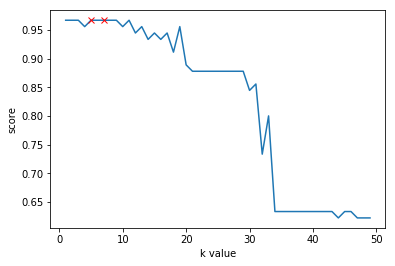

In [8]:
krange = range(1,50)
score = []
for k in krange:
    clf_knn = KNeighborsClassifier(n_neighbors=k) # Initialize Classifier
    clf_knn.fit(x_train, y_train) # Train
    ŷ = clf_knn.predict(x_test) # Predict
    accuracy = accuracy_score(y_test, ŷ) # Check results
    score.append(accuracy)

plt.plot(krange, score)
plt.plot([5,7],[max(score),max(score)], 'rx')
plt.ylabel('score')
plt.xlabel('k value')
plt.show()

The best fit is usually at k = 5 and k = 7 with ~3% error
<br>
k < 10 with ~5% error
<br>
k > 10 wtih ~10% error
<br>
k > 30 with ~50% error